In [1]:
import pandas as pd
import re

# Load CSV
df = pd.read_csv("filtered_gene_data.csv")

# Amino acid classification
aa_category = {
    'A': 'hydrophobic', 'V': 'hydrophobic', 'I': 'hydrophobic', 'L': 'hydrophobic',
    'M': 'hydrophobic', 'F': 'hydrophobic', 'W': 'hydrophobic', 'P': 'hydrophobic',
    'G': 'hydrophobic',
    'S': 'hydrophilic', 'T': 'hydrophilic', 'C': 'hydrophilic', 'N': 'hydrophilic',
    'Q': 'hydrophilic', 'Y': 'hydrophilic',
    'D': 'acidic', 'E': 'acidic',
    'K': 'basic', 'R': 'basic', 'H': 'basic'
}

# Allowed conversion pairs and their labels
conversion_labels = {
    ('hydrophobic', 'hydrophilic'): 'cross-category',
    ('hydrophilic', 'hydrophobic'): 'cross-category',
    ('acidic', 'basic'): 'cross-category',
    ('basic', 'acidic'): 'cross-category',
    ('hydrophobic', 'hydrophobic'): 'same-category',
    ('hydrophilic', 'hydrophilic'): 'same-category',
    ('acidic', 'acidic'): 'same-category',
    ('basic', 'basic'): 'same-category'
}

# Initialize stat storage
conversion_stats = {key: {'label': label, 'in_site': 0, 'out_site': 0}
                    for key, label in conversion_labels.items()}

# Regex for AA mutation parsing
pattern = re.compile(r'^p\.([A-Z])(\d+)([A-Z*]|=)')

# Helper to parse binding site positions
def parse_position(pos):
    if pd.isna(pos) or str(pos).strip() == '':
        return []
    if '-' in str(pos):
        try:
            start, end = map(int, pos.strip().split('-'))
            return list(range(start, end + 1))
        except:
            return []
    try:
        return [int(float(pos))]
    except:
        return []

# Iterate over all rows
for idx, row in df.iterrows():
    mutation_str = row['MUTATION_AA']
    if pd.isna(mutation_str):
        continue

    # Collect binding positions
    binding_positions = []
    for i in range(1, 21):
        col = f'Position_{i}'
        if col in row:
            binding_positions.extend(parse_position(row[col]))
    binding_positions = set(binding_positions)

    # Process each mutation
    for mutation in str(mutation_str).split('|'):
        mutation = mutation.strip()
        match = pattern.match(mutation)
        if not match:
            continue

        orig_aa = match.group(1)
        pos = int(match.group(2))
        new_aa = match.group(3)

        if new_aa == '=':
            new_aa = orig_aa

        if orig_aa not in aa_category or new_aa not in aa_category:
            continue

        orig_cat = aa_category[orig_aa]
        new_cat = aa_category[new_aa]
        key = (orig_cat, new_cat)

        if key not in conversion_stats:
            continue

        if pos in binding_positions:
            conversion_stats[key]['in_site'] += 1
        else:
            conversion_stats[key]['out_site'] += 1

# Create DataFrame for output
summary_df = pd.DataFrame([
    {
        'From_Category': orig,
        'To_Category': dest,
        'Conversion_Type': stats['label'],
        'In_Binding_Site': stats['in_site'],
        'Out_Binding_Site': stats['out_site']
    }
    for (orig, dest), stats in conversion_stats.items()
])

# Save to CSV
summary_df.to_csv("aa_conversion_binding_summary_filtered.csv", index=False)
print("Saved: aa_conversion_binding_summary_filtered.csv")


Saved: aa_conversion_binding_summary_filtered.csv


In [2]:
import pandas as pd
import re

# Load CSV
df = pd.read_csv("filtered_gene_data.csv")

# Amino acid classification
aa_category = {
    'A': 'hydrophobic', 'V': 'hydrophobic', 'I': 'hydrophobic', 'L': 'hydrophobic',
    'M': 'hydrophobic', 'F': 'hydrophobic', 'W': 'hydrophobic', 'P': 'hydrophobic',
    'G': 'hydrophobic',
    'S': 'hydrophilic', 'T': 'hydrophilic', 'C': 'hydrophilic', 'N': 'hydrophilic',
    'Q': 'hydrophilic', 'Y': 'hydrophilic',
    'D': 'acidic', 'E': 'acidic',
    'K': 'basic', 'R': 'basic', 'H': 'basic'
}

# Allowed conversion pairs and their labels
conversion_labels = {
    ('hydrophobic', 'hydrophilic'): 'cross-category',
    ('hydrophilic', 'hydrophobic'): 'cross-category',
    ('acidic', 'basic'): 'cross-category',
    ('basic', 'acidic'): 'cross-category',
    ('hydrophobic', 'hydrophobic'): 'same-category',
    ('hydrophilic', 'hydrophilic'): 'same-category',
    ('acidic', 'acidic'): 'same-category',
    ('basic', 'basic'): 'same-category'
}

# Initialize stats
conversion_stats = {key: {'label': label, 'in_site': 0, 'out_site': 0}
                    for key, label in conversion_labels.items()}

# Regex to extract AA mutations
pattern = re.compile(r'^p\.([A-Z])(\d+)([A-Z*]|=)')

# Helper: parse binding positions
def parse_position(pos):
    if pd.isna(pos) or str(pos).strip() == '':
        return []
    if '-' in str(pos):
        try:
            start, end = map(int, pos.strip().split('-'))
            return list(range(start, end + 1))
        except:
            return []
    try:
        return [int(float(pos))]
    except:
        return []

# Process each row
for _, row in df.iterrows():
    mutation_str = row['MUTATION_AA']
    if pd.isna(mutation_str):
        continue

    # Gather binding site positions
    binding_positions = []
    for i in range(1, 21):
        col = f'Position_{i}'
        if col in row:
            binding_positions.extend(parse_position(row[col]))
    binding_positions = set(binding_positions)

    # Analyze each mutation
    for mutation in str(mutation_str).split('|'):
        mutation = mutation.strip()
        match = pattern.match(mutation)
        if not match:
            continue

        orig_aa = match.group(1)
        pos = int(match.group(2))
        new_aa = match.group(3)

        if new_aa == '=':
            new_aa = orig_aa

        if orig_aa not in aa_category or new_aa not in aa_category:
            continue

        orig_cat = aa_category[orig_aa]
        new_cat = aa_category[new_aa]
        key = (orig_cat, new_cat)

        if key not in conversion_stats:
            continue

        if pos in binding_positions:
            conversion_stats[key]['in_site'] += 1
        else:
            conversion_stats[key]['out_site'] += 1

# Prepare DataFrame
summary_df = pd.DataFrame([
    {
        'From_Category': orig,
        'To_Category': dest,
        'Conversion_Type': stats['label'],
        'In_Binding_Site': stats['in_site'],
        'Out_Binding_Site': stats['out_site']
    }
    for (orig, dest), stats in conversion_stats.items()
])

# Save results
summary_df.to_csv("aa_conversion_binding_summary_filtered.csv", index=False)
print("Saved: aa_conversion_binding_summary_filtered.csv")

# Calculate total same-category mutations
same_in_site = sum(stats['in_site'] for (orig, dest), stats in conversion_stats.items() if orig == dest)
same_out_site = sum(stats['out_site'] for (orig, dest), stats in conversion_stats.items() if orig == dest)

print("\n=== Same-Category Mutation Totals ===")
print(f"Same-Category Mutations IN binding site:  {same_in_site}")
print(f"Same-Category Mutations OUT of binding site: {same_out_site}")


Saved: aa_conversion_binding_summary_filtered.csv

=== Same-Category Mutation Totals ===
Same-Category Mutations IN binding site:  6861
Same-Category Mutations OUT of binding site: 398347


   From_Category  To_Category  In_Percentage  Out_Percentage
0    hydrophobic  hydrophilic       1.172717       98.827283
1    hydrophilic  hydrophobic       2.071869       97.928131
2         acidic        basic       2.468512       97.531488
3          basic       acidic       3.194888       96.805112
4  same-category                    1.693204       98.306796


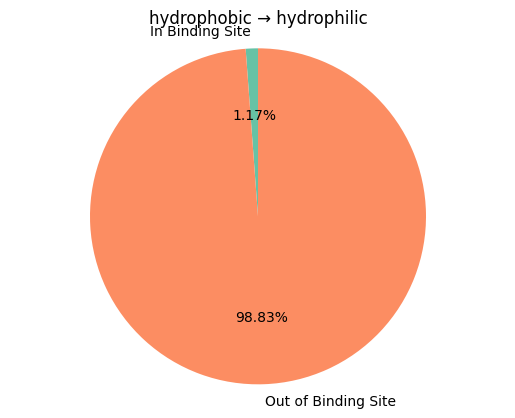

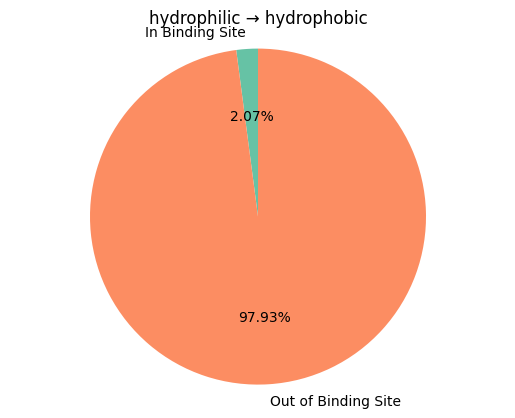

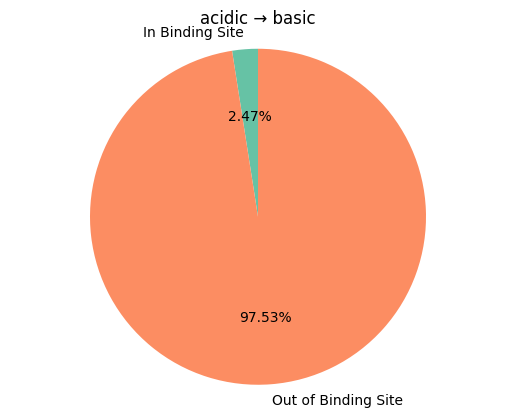

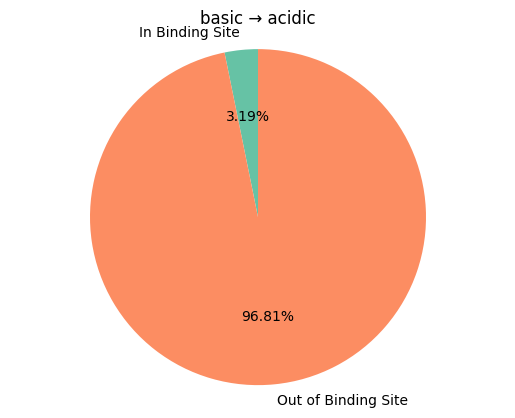

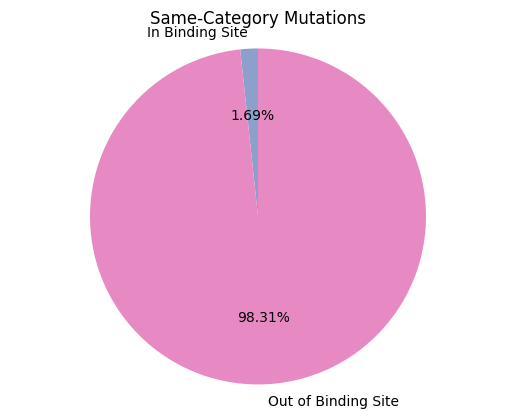

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("aa_conversion_binding_summary_filtered.csv")

# Calculate totals and percentages
df['Total'] = df['In_Binding_Site'] + df['Out_Binding_Site']
df['In_Percentage'] = (df['In_Binding_Site'] / df['Total']) * 100
df['Out_Percentage'] = (df['Out_Binding_Site'] / df['Total']) * 100

# Filter cross-category rows (from ≠ to)
cross_df = df[df['From_Category'] != df['To_Category']].copy()

# Plot pie charts for cross-category only
for _, row in cross_df.iterrows():
    label = f"{row['From_Category']} → {row['To_Category']}"
    values = [row['In_Binding_Site'], row['Out_Binding_Site']]
    plt.figure()
    plt.pie(values, labels=['In Binding Site', 'Out of Binding Site'],
            autopct='%1.2f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
    plt.title(label)
    plt.axis('equal')

# Combine same-category rows
same_df = df[df['From_Category'] == df['To_Category']]
same_in = same_df['In_Binding_Site'].sum()
same_out = same_df['Out_Binding_Site'].sum()

# Plot combined pie for same-category
plt.figure()
plt.pie([same_in, same_out], labels=['In Binding Site', 'Out of Binding Site'],
        autopct='%1.2f%%', startangle=90, colors=['#8da0cb', '#e78ac3'])
plt.title("Same-Category Mutations")
plt.axis('equal')

# Print percentage summary
df_summary = pd.concat([cross_df, pd.DataFrame([{
    'From_Category': 'same-category',
    'To_Category': '',
    'In_Binding_Site': same_in,
    'Out_Binding_Site': same_out,
    'Total': same_in + same_out,
    'In_Percentage': same_in / (same_in + same_out) * 100,
    'Out_Percentage': same_out / (same_in + same_out) * 100
}])], ignore_index=True)

print(df_summary[['From_Category', 'To_Category', 'In_Percentage', 'Out_Percentage']])



=== Mutation Binding Site Summary ===
hydrophobic → hydrophilic    Inside Binding Site:     941   Total Mutations:    80241   Percentage Inside:  1.17%
hydrophilic → hydrophobic    Inside Binding Site:    1186   Total Mutations:    57243   Percentage Inside:  2.07%
acidic → basic               Inside Binding Site:     733   Total Mutations:    29694   Percentage Inside:  2.47%
basic → acidic               Inside Binding Site:     130   Total Mutations:     4069   Percentage Inside:  3.19%
same-category                Inside Binding Site:    6861   Total Mutations:   405208   Percentage Inside:  1.69%


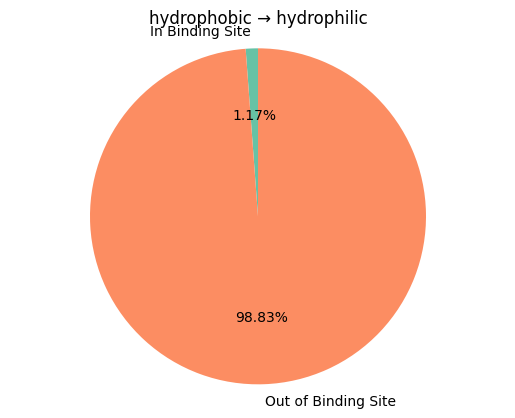

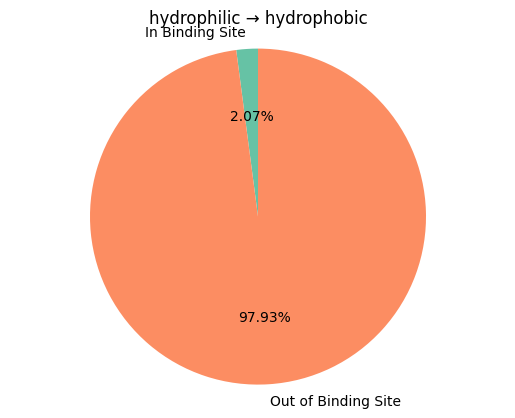

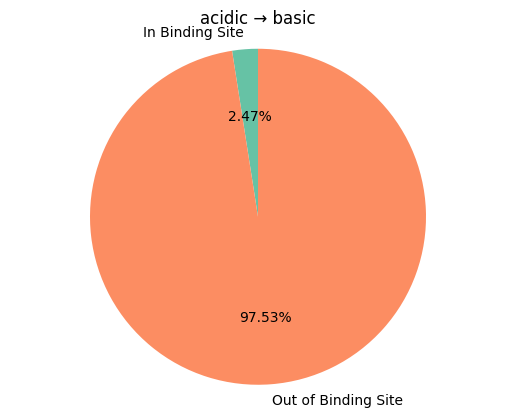

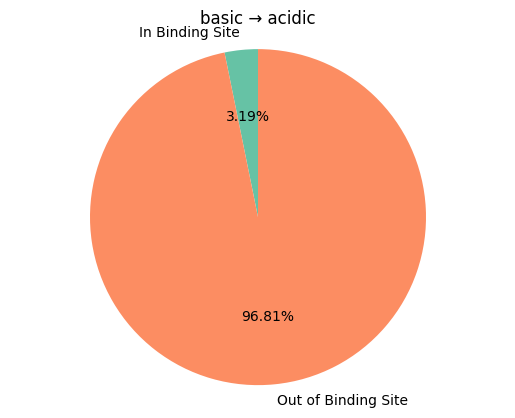

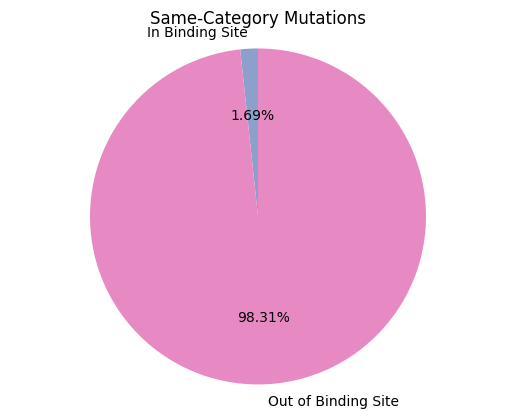

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("aa_conversion_binding_summary_filtered.csv")

# Calculate totals and percentages
df['Total'] = df['In_Binding_Site'] + df['Out_Binding_Site']
df['In_Percentage'] = (df['In_Binding_Site'] / df['Total']) * 100
df['Out_Percentage'] = (df['Out_Binding_Site'] / df['Total']) * 100

# Filter cross-category only
cross_df = df[df['From_Category'] != df['To_Category']].copy()

# Plot pie charts for cross-category conversions
for _, row in cross_df.iterrows():
    label = f"{row['From_Category']} → {row['To_Category']}"
    values = [row['In_Binding_Site'], row['Out_Binding_Site']]
    plt.figure()
    plt.pie(values, labels=['In Binding Site', 'Out of Binding Site'],
            autopct='%1.2f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
    plt.title(label)
    plt.axis('equal')

# Combine same-category rows
same_df = df[df['From_Category'] == df['To_Category']]
same_in = same_df['In_Binding_Site'].sum()
same_out = same_df['Out_Binding_Site'].sum()
same_total = same_in + same_out
same_percentage = (same_in / same_total) * 100

# Plot combined pie for same-category
plt.figure()
plt.pie([same_in, same_out], labels=['In Binding Site', 'Out of Binding Site'],
        autopct='%1.2f%%', startangle=90, colors=['#8da0cb', '#e78ac3'])
plt.title("Same-Category Mutations")
plt.axis('equal')

# Print formatted summary
print("\n=== Mutation Binding Site Summary ===")
for _, row in cross_df.iterrows():
    label = f"{row['From_Category']} → {row['To_Category']}"
    print(f"{label:<28} Inside Binding Site: {row['In_Binding_Site']:>7}   "
          f"Total Mutations: {row['Total']:>8}   "
          f"Percentage Inside: {row['In_Percentage']:5.2f}%")

# Print combined same-category result
print(f"{'same-category':<28} Inside Binding Site: {same_in:>7}   "
      f"Total Mutations: {same_total:>8}   "
      f"Percentage Inside: {same_percentage:5.2f}%")
